# Lennard-Jones

In [1]:
using LinearAlgebra
using Plots
using Printf

In [2]:
mutable struct Particle
    x::Vector
    v::Vector
    m
end

lennardjones_potential(r,p=12,q=6)=4*((1/r)^p-(1/r)^q)
lennardjones_force(r,p=12,q=6)=4*(p*(1/r)^(p+1)-q*(1/r)^(q+1))

lennardjones_force (generic function with 3 methods)

In [3]:
σ = 0.340
ϵ = 1.67
m = 66.34 # 10-27kg

66.34

In [4]:
xs= 0.9:0.01:3.0
plot(xs*σ,lennardjones_potential.(xs)*ϵ,label="",xlabel="nm",ylabel="zJ",ylims=(-2.0,2.0))
savefig("potential.png")

"/Users/hitoshi/Julia/MolecularDynamics/Jupyter/potential.png"

In [10]:
n = 10000

for Δt in [1,0.1,0.01,0.001,0.0001]
    p = Particle([0.8/σ],[0.0],1.0)
    for i=0:n/Δt
        acc = lennardjones_force(p.x[1])/p.m
        p.x[1] += p.v[1]*Δt+acc/2*Δt^2  
        acc_next =lennardjones_force(p.x[1])/p.m
        p.v[1] += (acc+acc_next)/2*Δt
    end
    @printf("Δt=%f\t r=%.6f\n",Δt,p.x[1])
end


Δt=1.000000	 r=2545329.379963
Δt=0.100000	 r=17372.150411
Δt=0.010000	 r=1.643133
Δt=0.001000	 r=1.775823
Δt=0.000100	 r=1.777345


┌ Info: Saved animation to /Users/hitoshi/Julia/MolecularDynamics/Jupyter/singleparticle.gif
└ @ Plots /Users/hitoshi/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/Users/hitoshi/Julia/MolecularDynamics/Jupyter/singleparticle.gif")
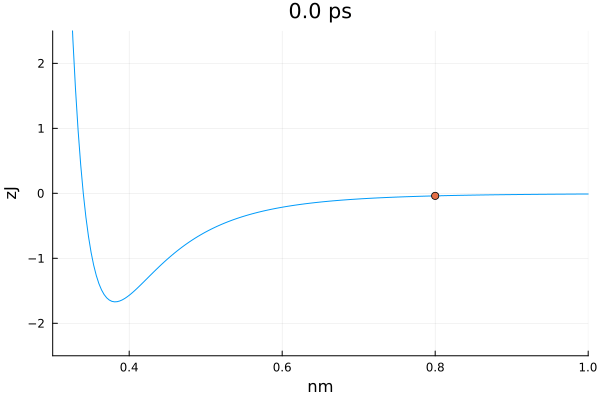

In [13]:
p = Particle([0.8/σ],[0.0],1.0)

xs= 0.5:0.01:3.0

anim =Animation()

n = 1000
samp = 10
Δt = 0.01

for i=0:n
    if i%samp == 0
        plt = plot(xs*σ,lennardjones_potential.(xs)*ϵ,label="",xlabel="nm",ylabel="zJ",xlims=(0.3,1.0),ylims=(-2.5,2.5))
        plot!(plt,[p.x[1]*σ],[lennardjones_potential(p.x[1])*ϵ],st=:scatter,label="",title=@sprintf("%3.1f ps",i*Δt*√(m*σ^2/ϵ)))
        frame(anim,plt)
    end
    acc = lennardjones_force(p.x[1])/p.m
    p.x[1] += p.v[1]*Δt+acc/2*Δt^2  
    acc_next =lennardjones_force(p.x[1])/p.m
    p.v[1] += (acc+acc_next)/2*Δt
end
gif(anim,"singleparticle.gif")